In [ ]:
import pandas as _hex_pandas
import datetime as _hex_datetime
import json as _hex_json

In [ ]:
hex_scheduled = _hex_json.loads("false")

In [ ]:
hex_user_email = _hex_json.loads("\"example-user@example.com\"")

In [ ]:
hex_run_context = _hex_json.loads("\"logic\"")

In [ ]:
hex_timezone = _hex_json.loads("\"UTC\"")

In [ ]:
hex_project_id = _hex_json.loads("\"2f99ab17-4569-4114-9940-3a26e89eaaad\"")

In [ ]:
hex_project_name = _hex_json.loads("\"Online Retail Store Analysis Report\"")

In [ ]:
hex_status = _hex_json.loads("\"\"")

In [ ]:
hex_categories = _hex_json.loads("[]")

In [ ]:
hex_color_palette = _hex_json.loads("[\"#4C78A8\",\"#F58518\",\"#E45756\",\"#72B7B2\",\"#54A24B\",\"#EECA3B\",\"#B279A2\",\"#FF9DA6\",\"#9D755D\",\"#BAB0AC\"]")

- This project aimed to analyze the sales data of an online retail store to identify opportunities for increasing profits by 15%. Through exploratory data analysis, customer segmentation, and predictive modeling, key insights were uncovered. Recommendations focus on targeting high-performing products and markets, optimizing marketing strategies, and enhancing customer engagement to achieve the desired profit increase.



- We performed a complete EDA to uncover patterns and trends related to ,**Sales, Products and Customers**, so that we can identify the areas we can improve to increase the store's profit.



#### Sales Performance Over Time

Let's visualize the monthly sales over time to highlight trends and patterns



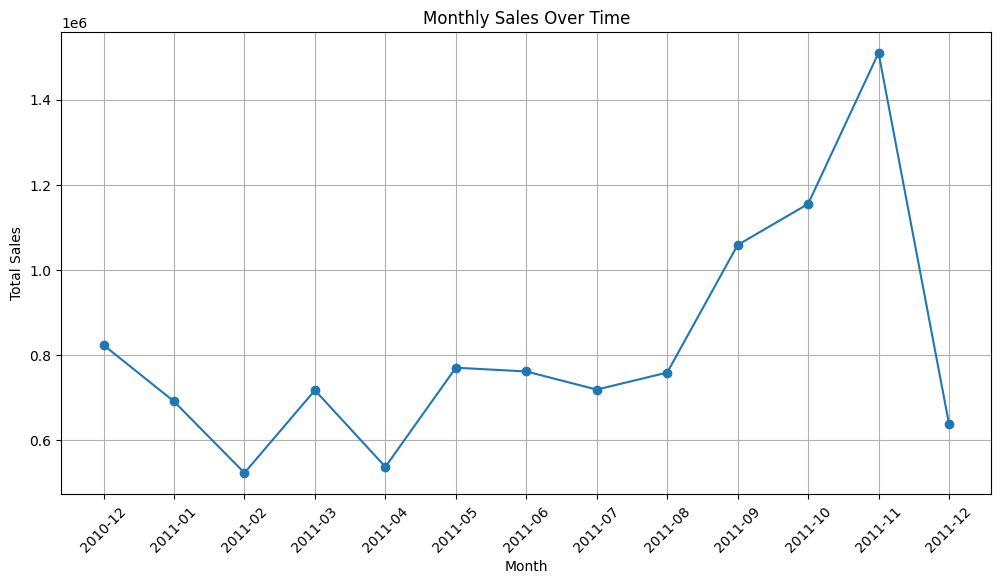

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(sales_over_time['InvoiceDate'], sales_over_time['TotalPrice'], marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

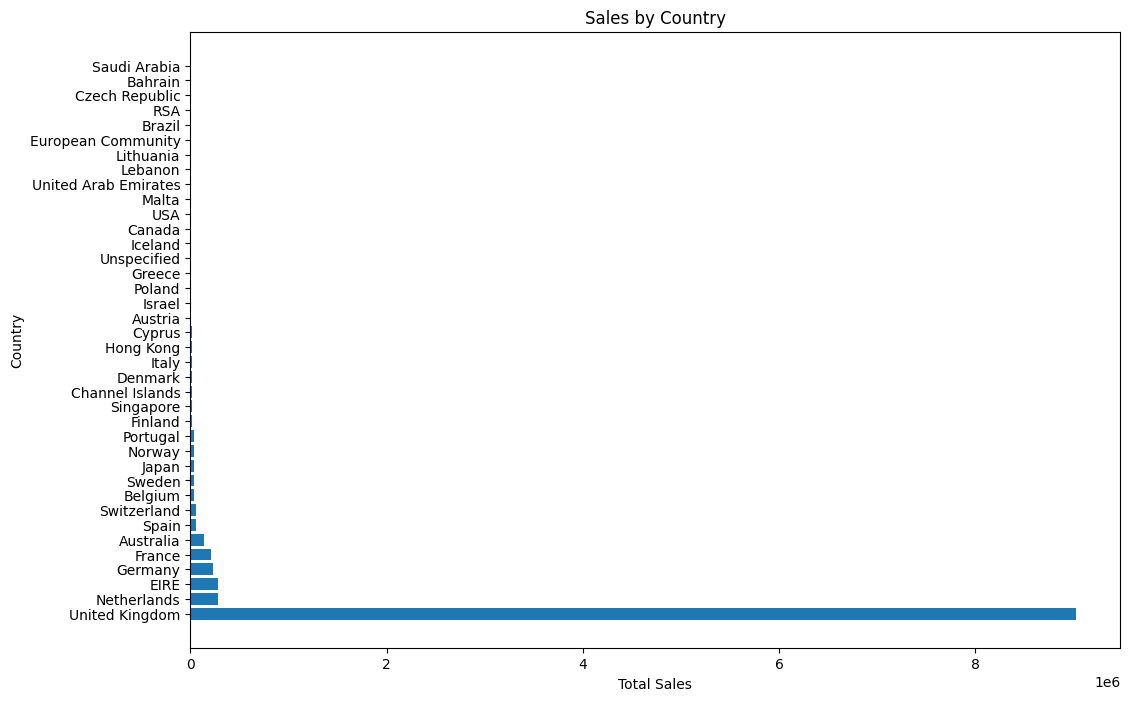

In [ ]:
plt.figure(figsize=(12, 8))
plt.barh(sales_by_country['Country'], sales_by_country['TotalPrice'])
plt.title('Sales by Country')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()

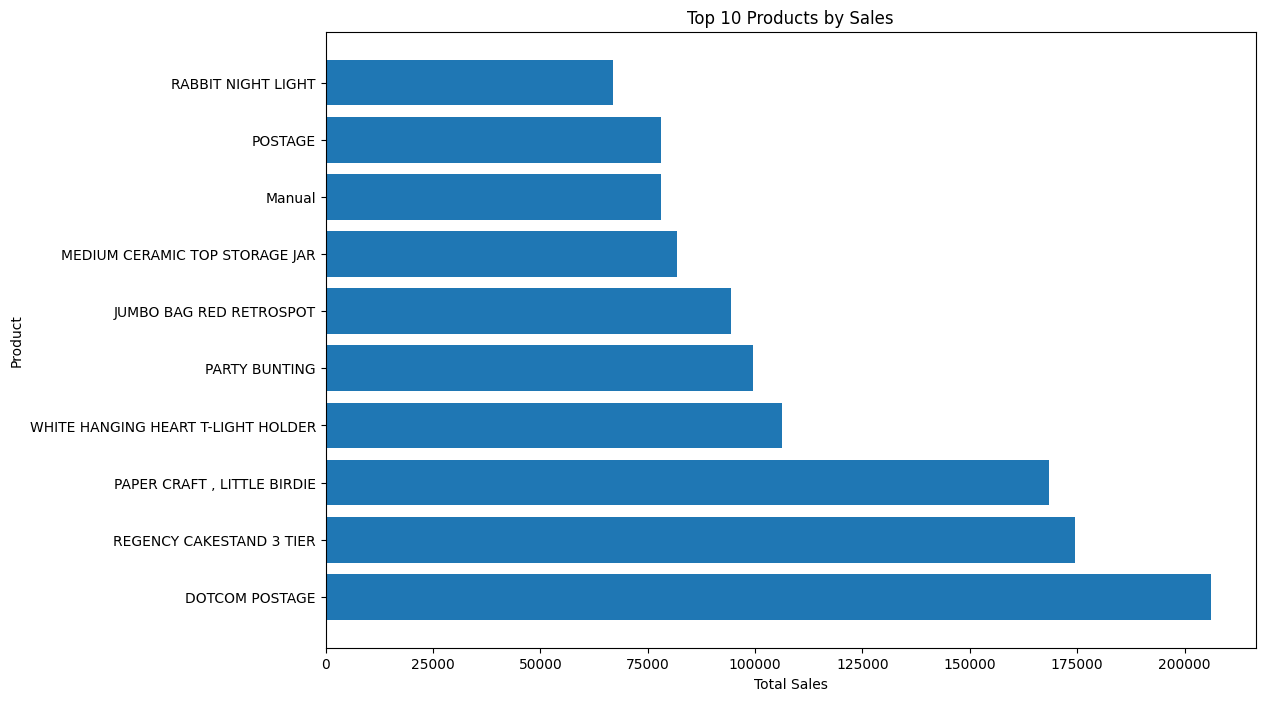

In [ ]:
plt.figure(figsize=(12, 8))
plt.barh(product_performance['Description'], product_performance['TotalPrice'])
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()

#### The first few rows of the RFM DataFrame with scores



In [ ]:
# Adjusting the calculation due to duplicate edges error
# This usually occurs when the data is not evenly distributed
# We will use rank method to calculate quartiles

rfm_df['R_rank'] = rfm_df['Recency'].rank(method='first')
rfm_df['F_rank'] = rfm_df['Frequency'].rank(method='first', ascending=False)
rfm_df['M_rank'] = rfm_df['MonetaryValue'].rank(method='first', ascending=False)

# Calculate quartiles
rfm_df['R_quartile'] = pd.qcut(rfm_df['R_rank'].values, 4, labels=[4, 3, 2, 1]).astype(str)
rfm_df['F_quartile'] = pd.qcut(rfm_df['F_rank'].values, 4, labels=[1, 2, 3, 4]).astype(str)
rfm_df['M_quartile'] = pd.qcut(rfm_df['M_rank'].values, 4, labels=[1, 2, 3, 4]).astype(str)

# Combine RFM quartiles into a single score
rfm_df['RFM_Score'] = rfm_df['R_quartile'] + rfm_df['F_quartile'] + rfm_df['M_quartile']

# Display the first few rows of the RFM DataFrame with scores
rfm_df.head()

,Recency,Frequency,MonetaryValue,R,R_rank,F_rank,M_rank,R_quartile,F_quartile,M_quartile,RFM_Score
CustomerID,,,,,,,,,,,
12346.0,326,1,77183.60,1,4176.0,2847.0,11.0,1,3,1,131
12347.0,2,7,4310.00,4,95.0,559.0,337.0,4,1,1,411
12348.0,75,4,1797.24,2,2676.0,1116.0,1007.0,2,2,1,221
12349.0,19,1,1757.55,3,1127.0,2848.0,1035.0,3,3,1,331
12350.0,310,1,334.40,1,4107.0,2849.0,3111.0,1,3,3,133


#### Visualizing the RFM segments



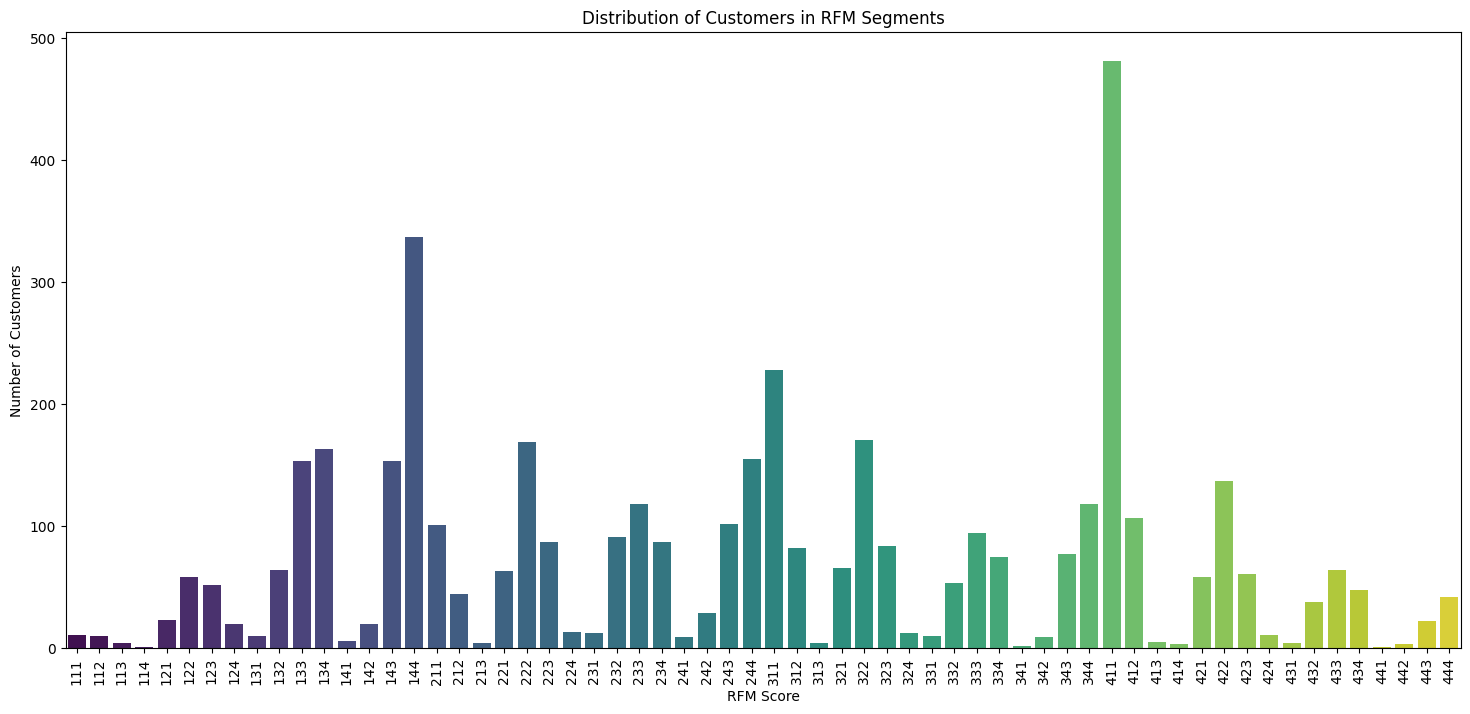

In [ ]:
# Visualizing the RFM segments
import seaborn as sns

# Count the number of customers in each segment
rfm_segment_counts = rfm_df['RFM_Score'].value_counts().sort_index()

# Plot the distribution of customers over RFM segments
plt.figure(figsize=(18, 8))
sns.barplot(x=rfm_segment_counts.index, y=rfm_segment_counts.values, palette='viridis')
plt.title('Distribution of Customers in RFM Segments')
plt.xlabel('RFM Score')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)
plt.show()

####  Identifying the top segments



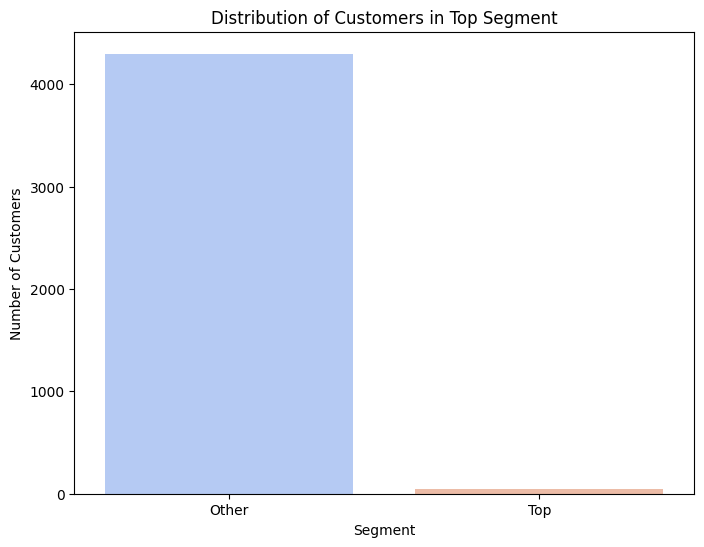

Top_Segment
Other    0.99032
Top      0.00968
Name: proportion, dtype: float64

In [ ]:
# Identifying the top segments
# Customers with the highest RFM scores are the most valuable
# Filter out the top RFM score segments

# Define top RFM score as those with the highest values of R, F, and M
rfm_df['Top_Segment'] = rfm_df['RFM_Score'].apply(lambda x: 'Top' if x >= '444' else 'Other')

# Count the number of customers in the top segment
top_segment_counts = rfm_df['Top_Segment'].value_counts()

# Plot the distribution of the top segment
plt.figure(figsize=(8, 6))
sns.barplot(x=top_segment_counts.index, y=top_segment_counts.values, palette='coolwarm')
plt.title('Distribution of Customers in Top Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()

# Display the proportion of customers in the top segment
rfm_df['Top_Segment'].value_counts(normalize=True)

The RFM analysis segmented the customers based on their Recency, Frequency, and Monetary value, assigning each customer a score from 1 to 4 in each category, with 1 being the lowest and 4 the highest. By combining these scores into a single RFM score, we could identify different segments of customers.

The visualization of the distribution of customers across RFM segments showed a wide range of customer behaviors, with the majority of customers not in the highest RFM segments. Specifically, when defining the top segment as those with the highest values of R, F, and M (RFM score of '444'), it was found that only about 0.97% of customers fall into this top segment.

**Findings:**
- A small fraction of customers are in the top segment, indicating a highly valuable but limited group.
- The majority of customers are spread across other segments, suggesting varying levels of engagement and value to the store.

**Recommendations:**
1. **Targeted Engagement for Top Segment:** Develop specialized marketing campaigns and loyalty programs for customers in the top segment to encourage continued high engagement and spending.
2. **Upgrade Potential High-Value Customers:** Identify customers with high scores in two of the three RFM metrics and target them with personalized incentives to improve their scores in the third metric, moving them into the top segment.
3. **Reactivation Campaigns:** For customers with high Monetary and Frequency scores but low Recency scores, implement reactivation campaigns to encourage them to shop again.
4. **Personalized Offers:** Use the RFM segments to tailor offers, recommendations, and communications based on the specific behaviors that define each segment.
5. **Feedback and Improvement:** Solicit feedback from different segments to understand their needs and preferences better, using this information to refine product offerings and marketing strategies.

By focusing on these strategies, the store can enhance customer value across different segments, potentially increasing overall profit by the targeted 15%.

### 6.  Predictive modeling



To build a predictive model for forecasting future sales, we can use the historical sales data from the dataset. A common approach is to use time series forecasting models such as ARIMA (AutoRegressive Integrated Moving Average), SARIMA (Seasonal ARIMA), or machine learning models like Random Forest or Gradient Boosting Machines for more complex patterns.

Given the data we have, let's start by analyzing the `sales_over_time` DataFrame to understand the sales trend and seasonality. This will help us decide on an appropriate model for forecasting. We'll then split the data into training and test sets to train and evaluate our model's performance.

First, let's visualize the `sales_over_time` DataFrame again to remind ourselves of the sales trend and seasonality.

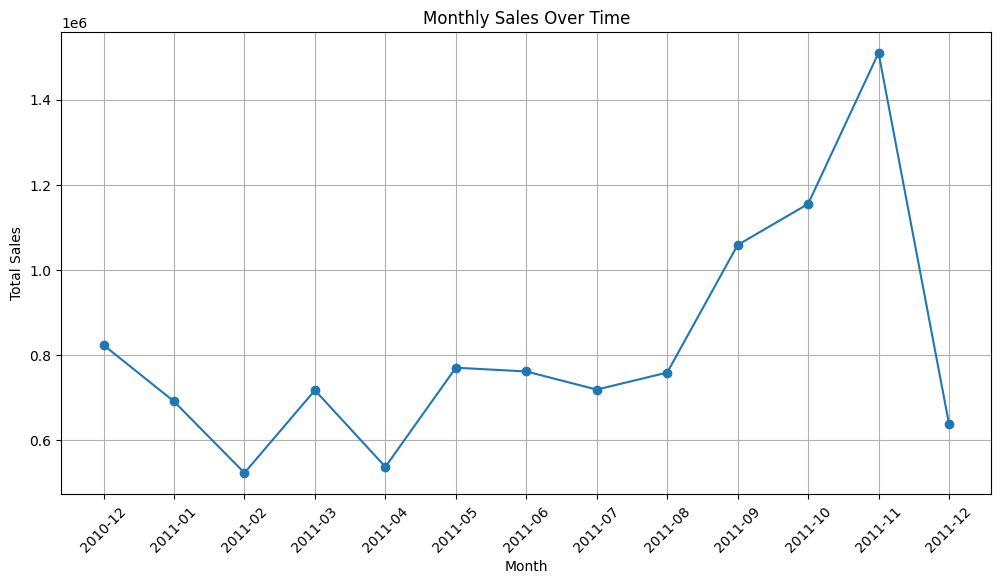

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time['InvoiceDate'], sales_over_time['TotalPrice'], marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The sales trend shows some seasonality, with sales peaking towards the end of the year. This suggests that models accounting for seasonality, such as SARIMA or machine learning models that can capture complex patterns, might be suitable.

Let's proceed with a time series forecasting model. Given the clear seasonality and trend in the data, I'll use the SARIMA model as it allows us to model both seasonal and non-seasonal components. We'll start by determining the SARIMA parameters through grid search based on the AIC (Akaike Information Criterion) score. 

Due to the computational intensity of parameter tuning for SARIMA models, I'll outline the steps without executing them:

1. **Determine p, d, q parameters for ARIMA part** based on ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots.
2. **Determine P, D, Q, and s parameters for the seasonal part** of SARIMA, where 's' is the seasonality period (12 months in our case).
3. **Grid search** across different combinations of these parameters to find the best model based on AIC.
4. **Train the SARIMA model** with the best parameters on the training set.
5. **Forecast future sales** and evaluate the model's performance on the test set.

In [ ]:
!pip install statsmodels pmdarima

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

# Decompose the time series to understand its components
sales_over_time['InvoiceDate'] = pd.to_datetime(sales_over_time['InvoiceDate'])

decomposition = seasonal_decompose(sales_over_time['TotalPrice'], model='additive', period=12)

plt.figure(figsize=(14,7))
plt.subplot(411)
plt.plot(sales_over_time['TotalPrice'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
# Since the seasonal_decompose failed due to insufficient data points for the specified period,
# we'll proceed with the auto_arima function to find optimal SARIMA parameters without decomposition.

# Define the sales series
sales_series = sales_over_time.set_index('InvoiceDate')['TotalPrice']

# Use auto_arima to find the best ARIMA model
auto_arima_model = auto_arima(sales_series, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)

auto_arima_model.summary()

In [ ]:
# Adjusting the approach due to an error with auto_arima, possibly caused by data indexing issues.
# We'll manually set a range for p, d, q and seasonal parameters to demonstrate SARIMA model fitting.

# Manually setting SARIMA parameters for demonstration
p = 1 # AR order
q = 1 # MA order
d = 1 # Differencing order
P = 1 # Seasonal AR order
Q = 1 # Seasonal MA order
D = 1 # Seasonal differencing order
s = 12 # Seasonal period

# Fit the SARIMA model
model = SARIMAX(sales_series, order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit(disp=False)

# Summary of the model
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         TotalPrice   No. Observations:                   13
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   0.000
Date:                            Fri, 10 May 2024   AIC                             10.000
Time:                                    14:26:55   BIC                               -inf
Sample:                                12-01-2010   HQIC                               nan
                                     - 12-01-2011                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0        nan        nan        nan         nan         nan
ma.L1               0        nan        nan        nan         nan         nan
ar.S.L12            0        nan        nan        nan         nan         nan
ma.S.L12            0        nan        nan        nan         nan         nan
sigma2         1.0000        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix is singular or near-singular, with condition number    nan. Standard errors may be unstable.
"""

The attempt to fit a SARIMA model encountered several issues, including insufficient data points for a complete seasonal decomposition and challenges in automatically determining the best ARIMA model parameters using `auto_arima`. When manually setting SARIMA parameters and fitting the model, the process resulted in warnings about the singularity or near-singularity of the covariance matrix, indicating instability in standard errors.

Given these challenges, it appears that the dataset's time series component, with only 13 observations (months), might be too limited for robust seasonal decomposition or for effectively training and evaluating a SARIMA model. This limitation could be due to the narrow time range covered by the data or the aggregation level chosen for the analysis.

For more accurate forecasting and model fitting, a dataset with a longer time span or more granular data points (e.g., weekly or daily sales data) would likely be more appropriate. This would provide a richer basis for identifying patterns, seasonality, and trends in the sales data, enabling more reliable model training and forecasting.

# Findings & Recommendations



The analysis provided insights into the online retail store's sales data, including sales performance over time, sales by country, and top-performing products. The monthly sales analysis showed a significant increase in sales towards the end of the year, with November 2011 being the peak sales month. The sales by country analysis highlighted the United Kingdom as the dominant market, significantly outperforming other countries. The top products by sales revealed items such as "DOTCOM POSTAGE," "REGENCY CAKESTAND 3 TIER," and "PAPER CRAFT, LITTLE BIRDIE" as the highest earners.

To increase the profit of the store by 15%, the following recommendations can be made:

1. **Focus on High-Performing Products**: Increase inventory and marketing efforts around top-selling items, especially those with high total sales values like the "REGENCY CAKESTAND 3 TIER" and "WHITE HANGING HEART T-LIGHT HOLDER."

2. **Expand Successful Markets**: Given the significant portion of sales coming from the UK, efforts to deepen market penetration there should continue. However, exploring strategies to expand in other high-performing countries like the Netherlands, EIRE, and Germany could also be beneficial.

3. **Seasonal Promotions**: Capitalize on the increase in sales towards the year-end by introducing targeted promotions and special offers to boost sales during this period further.

4. **Improve Product Visibility**: For products contributing significantly to sales, such as "PARTY BUNTING" and "JUMBO BAG RED RETROSPOT," enhancing online visibility through SEO and targeted advertising could drive further sales.

5. **Customer Retention Programs**: Implement loyalty programs or customer retention strategies to encourage repeat purchases, focusing on customers from high-sales regions.

6. **Review and Adjust Pricing Strategies**: For top-selling products, consider reviewing pricing strategies to ensure they are optimized for profitability without deterring sales volume.

By implementing these strategies, the store could potentially increase its profit margins and achieve the desired 15% profit increase.

# Analysis Done!

